In [23]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
import json

In [119]:
save_path = "C:\\Users\\Administrator\\Desktop\\DRO_survival\\dro_simulation\\plots"

# Tail

In [145]:
with open("dro_tail_simulation_config.json", "r") as f:
    sim_config = json.load(f)

In [146]:
with open(f'./data/tail_major_loss_.pkl', 'rb') as file:
    major_loss = pickle.load(file)

with open(f'./data/tail_minor_loss_.pkl', 'rb') as file:
    minor_loss = pickle.load(file)

with open(f'./data/tail_beta_fitted_.pkl', 'rb') as file:
    beta_fitted = pickle.load(file)

with open(f'./data/tail_eta_fitted_.pkl', 'rb') as file:
    eta_fitted = pickle.load(file)

In [147]:
beta_fitted_mean = beta_fitted.mean(axis=0)
beta_fitted_std = beta_fitted.std(axis=0)
major_loss_mean = major_loss.mean(axis=0)
major_loss_std = major_loss.std(axis=0)
minor_loss_mean = minor_loss.mean(axis=0)
minor_loss_std = minor_loss.std(axis=0)

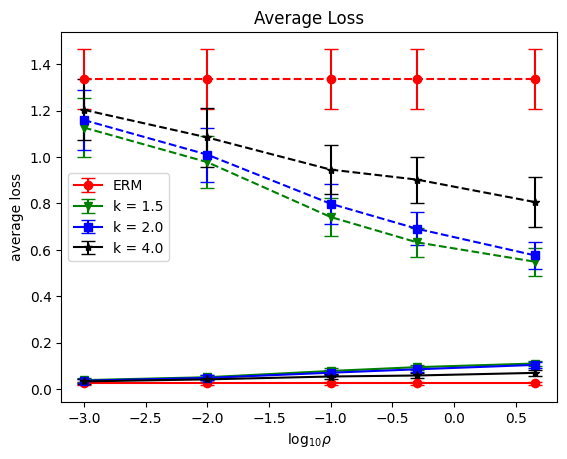

In [151]:
plot_x = np.log(sim_config['rho_candidates'])/np.log(10.0)
marker_list = ['v', 's', '*']
color_list = ['green', 'blue', 'black']
plt.figure()
plt.errorbar(plot_x, major_loss_mean[-1,:], yerr=1.96*major_loss_std[-1,:], capsize=5, marker='o', color = 'red', label = 'ERM')
plt.errorbar(plot_x, minor_loss_mean[-1,:], yerr=1.96*minor_loss_std[-1,:], capsize=5, marker='o', color = 'red', linestyle = '--')

for k_ind, k in enumerate(sim_config['k_candidates']):
    plt.errorbar(plot_x, major_loss_mean[k_ind,:], yerr=1.96*major_loss_std[k_ind,:], capsize=5, color = color_list[k_ind], marker=marker_list[k_ind], label = f'k = {k:.1f}')
    plt.errorbar(plot_x, minor_loss_mean[k_ind,:], yerr=1.96*minor_loss_std[k_ind,:], capsize=5, color = color_list[k_ind], linestyle='--', marker=marker_list[k_ind])
plt.xlabel(r'log$_{10}\rho$')
plt.ylabel('average loss')
plt.legend()
plt.title("Average Loss")
plt.savefig(f"{save_path}\\tail_major_vs_minor.png", dpi=300)
plt.show()
plt.close()

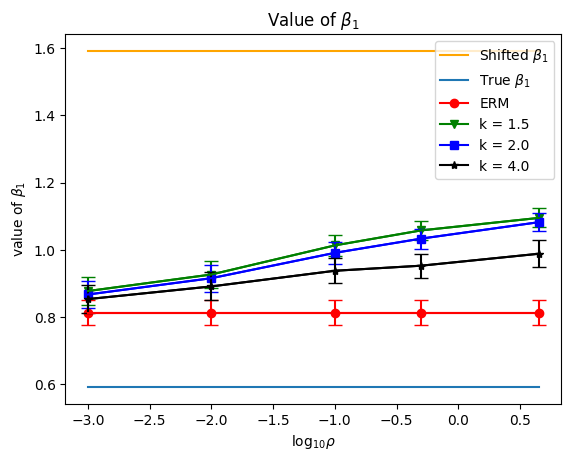

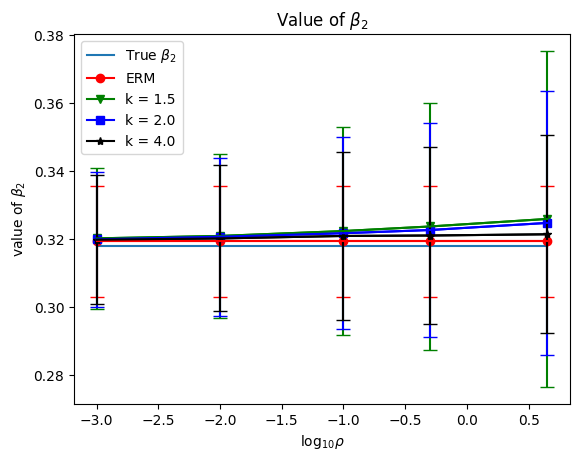

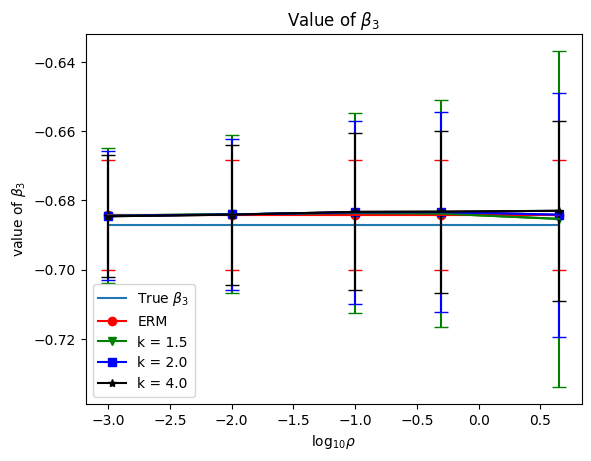

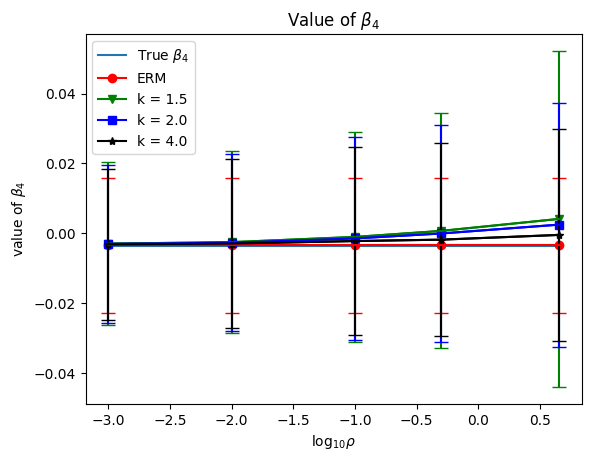

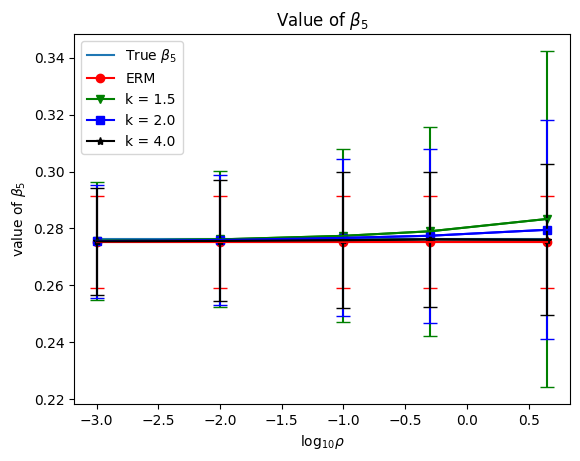

In [152]:
beta = [0.59201287,  0.3180074,  -0.6870728,  -0.00372739,  0.27624108]
beta1_shift = 1
for i in range(len(beta)):
    plt.figure()
    if i == 0:
        plt.plot(plot_x, [beta1_shift + beta[0]]*len(plot_x), label = r'Shifted $\beta_{}$'.format(i+1), color='orange')
    plt.plot(plot_x, [beta[i]]*len(plot_x), label = r'True $\beta_{}$'.format(i+1))
    plt.plot(plot_x, beta_fitted_mean[-1, :, i], label="ERM", marker="o", color="red")
    plt.errorbar(plot_x, beta_fitted_mean[-1, :, i], yerr=1.96*beta_fitted_std[-1, :, i], capsize=5, color="red")
    for k_ind, k in enumerate(sim_config['k_candidates']):
        plt.plot(plot_x, beta_fitted_mean[k_ind,:,i], label = f'k = {k:.1f}', marker=marker_list[k_ind], color=color_list[k_ind])
        plt.errorbar(plot_x, beta_fitted_mean[k_ind,:,i], yerr=1.96*beta_fitted_std[k_ind,:,i], capsize=5, color=color_list[k_ind])
    plt.xlabel(r'log$_{10}\rho$')
    plt.ylabel(r'value of $\beta_{}$'.format(i+1))
    plt.legend()
    plt.title(r'Value of $\beta_{}$'.format(i+1))
    plt.savefig(f"{save_path}\\tail_beta{i+1}.png", dpi=300)
    plt.show()
    plt.close()

# Subpop

In [76]:
with open("dro_subpop_simulation_config.json", "r") as f:
    sim_config = json.load(f)

In [77]:
with open(f'./data/subpop_avg_test_loss.pkl', 'rb') as file:
    avg_test_loss = pickle.load(file)

with open(f'./data/subpop_loss_on_minor.pkl', 'rb') as file:
    loss_on_minor = pickle.load(file)

with open(f'./data/subpop_beta_fitted.pkl', 'rb') as file:
    beta_fitted = pickle.load(file)

with open(f'./data/subpop_eta_fitted.pkl', 'rb') as file:
    eta_fitted = pickle.load(file)

In [78]:
beta_fitted_mean = beta_fitted.mean(axis=0)
beta_fitted_std = beta_fitted.std(axis=0)
avg_test_loss_mean = avg_test_loss.mean(axis=0)
avg_test_loss_std = avg_test_loss.std(axis=0)
loss_on_minor_mean = loss_on_minor.mean(axis=0)
loss_on_minor_std = loss_on_minor.std(axis=0)

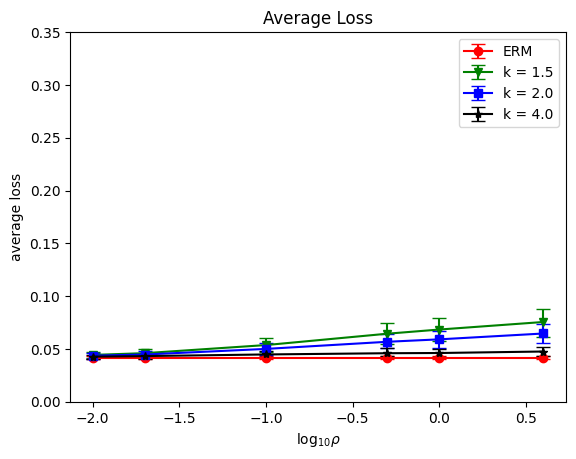

In [122]:
plot_x = sim_config['log10_rho_candidates']
marker_list = ['v', 's', '*']
color_list = ['green', 'blue', 'black']
upper_err = avg_test_loss.max(axis=0) - avg_test_loss_mean
lower_err = avg_test_loss_mean - avg_test_loss.min(axis=0)
plt.figure()
plt.errorbar(plot_x, avg_test_loss_mean[-1,:], yerr=[lower_err[-1,:], upper_err[-1,:]], capsize=5, marker='o', color = 'red', label = 'ERM')
for k_ind, k in enumerate(sim_config['k_candidates']):
    plt.errorbar(plot_x, avg_test_loss_mean[k_ind,:], yerr=[lower_err[k_ind,:], upper_err[k_ind,:]], capsize=5, label = f'k = {k:.1f}', marker=marker_list[k_ind], color = color_list[k_ind])
plt.xlabel(r'log$_{10}\rho$')
plt.ylabel('average loss')
plt.ylim((0.0, 0.35))
plt.legend()
plt.title("Average Loss")
plt.savefig(f"{save_path}\\two_subpop_average_loss.png", dpi=300)
plt.show()
plt.close()

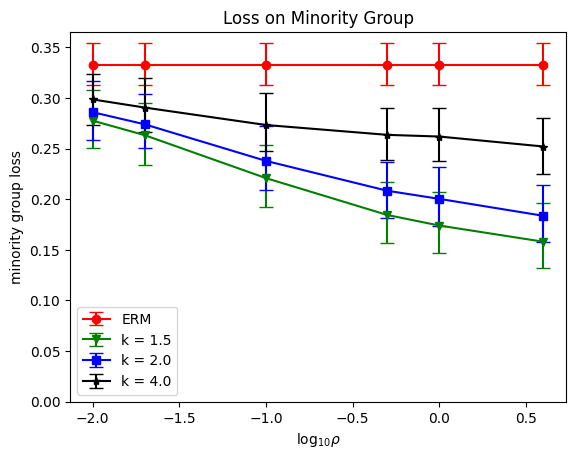

In [123]:
upper_err = loss_on_minor.max(axis=0) - loss_on_minor_mean
lower_err = loss_on_minor_mean - loss_on_minor.min(axis=0)
plt.figure()
plt.errorbar(plot_x, loss_on_minor_mean[-1,:], yerr=[lower_err[-1,:], upper_err[-1,:]], capsize=5, marker='o', color = 'red', label = 'ERM')
for k_ind, k in enumerate(sim_config['k_candidates']):
    plt.errorbar(plot_x, loss_on_minor_mean[k_ind,:], yerr=[lower_err[k_ind,:], upper_err[k_ind,:]], capsize=5, label = f'k = {k:.1f}', marker=marker_list[k_ind], color = color_list[k_ind])
plt.xlabel(r'log$_{10}\rho$')
plt.ylabel('minority group loss')
plt.ylim(bottom=0.0)
plt.legend()
plt.title("Loss on Minority Group")
plt.savefig(f"{save_path}\\two_subpop_loss_on_minority.png", dpi=300)
plt.show()
plt.close()

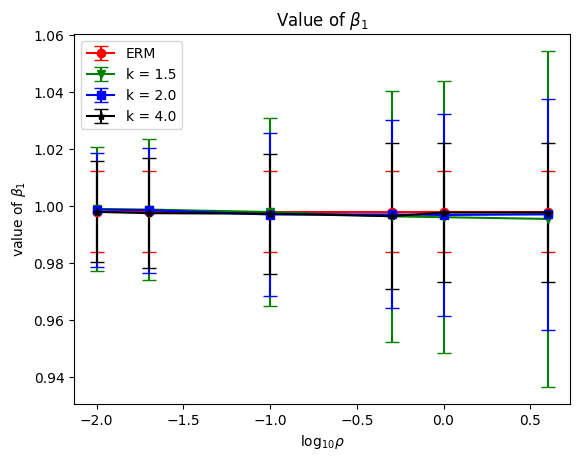

In [141]:
upper_err = beta_fitted_std*1.96
lower_err = beta_fitted_std*1.96
plt.figure()
plt.errorbar(plot_x, beta_fitted_mean[-1,:,0], yerr=[lower_err[-1,:,0], upper_err[-1,:,0]], capsize=5, marker='o', color = 'red', label = 'ERM')
for k_ind, k in enumerate(sim_config['k_candidates']):
    plt.errorbar(plot_x, beta_fitted_mean[k_ind,:,0], yerr=[lower_err[k_ind,:,0], upper_err[k_ind,:,0]], capsize=5, label = f'k = {k:.1f}', marker=marker_list[k_ind], color = color_list[k_ind])
plt.xlabel(r'log$_{10}\rho$')
plt.ylabel(r"value of $\beta_1$")
plt.legend()
plt.title(r"Value of $\beta_1$")
plt.savefig(f"{save_path}\\two_subpop_beta1.png", dpi=300)
plt.show()
plt.close()

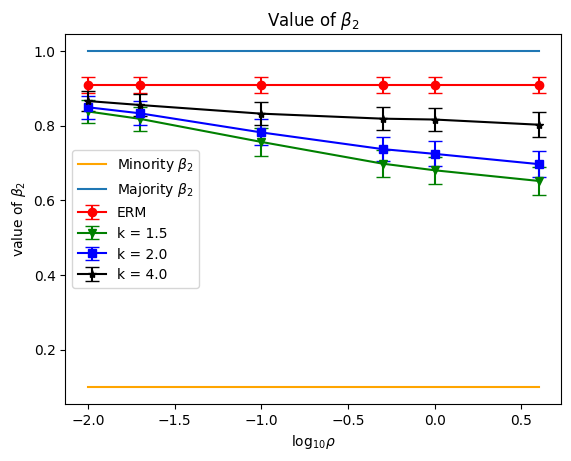

In [139]:
upper_err = beta_fitted_std*1.96
lower_err = beta_fitted_std*1.96

plt.figure()
plt.plot(plot_x, [0.1]*len(plot_x), label = r'Minority $\beta_{}$'.format(2), color='orange')
plt.plot(plot_x, [1]*len(plot_x), label = r'Majority $\beta_{}$'.format(2))
plt.errorbar(plot_x, beta_fitted_mean[-1,:,1], yerr=[lower_err[-1,:,1], upper_err[-1,:,1]], capsize=5, marker='o', color = 'red', label = 'ERM')
for k_ind, k in enumerate(sim_config['k_candidates']):
    plt.errorbar(plot_x, beta_fitted_mean[k_ind,:,1], yerr=[lower_err[k_ind,:,1], upper_err[k_ind,:,1]], capsize=5, label = f'k = {k:.1f}', marker=marker_list[k_ind], color = color_list[k_ind])
plt.xlabel(r'log$_{10}\rho$')
plt.ylabel(r"value of $\beta_2$")
plt.legend()
plt.title(r"Value of $\beta_2$")
plt.savefig(f"{save_path}\\two_subpop_beta2.png", dpi=300)
plt.show()
plt.close()

In [154]:
eta_fitted.mean(axis=0)

array([[-1.33998757e+01, -6.01655288e+00, -1.76837315e+00,
        -6.40951079e-01,  3.50594365e-01],
       [-7.50851634e+00, -2.82658203e+00, -6.88987525e-01,
        -1.42602172e-01,  3.95490889e-01],
       [-2.69023986e+00, -7.10396169e-01, -7.22256836e-02,
         6.86138856e-03,  1.34825335e-01]])